# 数据预处理

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format',lambda x : '%.2f' % x)
plt.rcParams['axes.unicode_minus'] = False
from warnings import filterwarnings
filterwarnings('ignore')

# 扫描样本

In [2]:
df1 = pd.read_csv('./data/500_Person_Gender_Height_Weight_Index.csv')
df1.head(3)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4


# 缺失值/异常值处理

删除空值行/列

In [3]:
df1.dropna()
df1.dropna(axis=1)
df1.dropna(how='all')

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


填充空值

In [4]:
df1.fillna(0)
df1.fillna(axis=1,method='ffill')
df1.fillna(axis=0,method='ffill')

df1['Height'].fillna(df1.Height.mean())
df1['Height'].fillna(df1.Height.mode())
df1['Height'].fillna(df1.Height.median())
#df1.replace("Male", 0,inplace=True)
#df1.replace("Female", 1,inplace=True)

0      174
1      189
2      185
3      195
4      149
      ... 
495    150
496    184
497    141
498    150
499    173
Name: Height, Length: 500, dtype: int64

# 增加特征项

In [5]:
df1.rename(columns={'Index':"Level"},inplace=True)
df1.sort_values('Height',ascending=True,inplace=True)
df1.reset_index(inplace=True)
plt.style.use({'figure.figsize':(8, 6)})
df1['Ratio'] = df1['Weight']/df1['Height']
df1.sort_values('Ratio',ascending=True,inplace=True)
df1.reset_index(drop=True,inplace=True)
del df1['index']
df1.tail(5)

,Gender,Height,Weight,Level,Ratio
495,Male,148,155,5,1.05
496,Female,146,157,5,1.08
497,Male,140,152,5,1.09
498,Male,145,160,5,1.10
499,Female,142,159,5,1.12


# 数据变换

Min abnormal
   Gender  Height_scaled  Weight_scaled  Height  Weight   Ratio  Multi  Level
0  Female           0.00          -1.64     170      53 -478.59  -0.01      1
Max abnormal
     Gender  Height_scaled  Weight_scaled  Height  Weight  Ratio  Multi  Level
499  Female           0.00           1.54     170     156 451.50   0.01      5


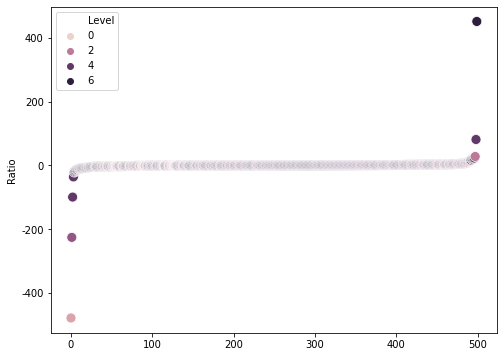

In [6]:
Height_scaled = (df1['Height']-df1['Height'].mean())/(df1['Height'].std())  
Weight_scaled = (df1['Weight']-df1['Weight'].mean())/(df1['Weight'].std())  
df2 = pd.DataFrame()
df2['Gender'] = df1['Gender']
df2['Height_scaled'] = Height_scaled
df2['Weight_scaled'] = Weight_scaled
df2['Height'] = df1['Height']
df2['Weight'] = df1['Weight']
df2['Ratio'] = Weight_scaled/Height_scaled
df2['Multi'] = Weight_scaled*Height_scaled
df2['Level'] = df1['Level']

df2.sort_values('Ratio',ascending=True,inplace=True)
df2 = df2.reset_index(drop=True)

print("Min abnormal")
print(df2.head(1))
print("Max abnormal")
print(df2.tail(1))
ax = sns.scatterplot(x=df2.index, y="Ratio",s=100,hue='Level',data=df2)



# 正则化前对比

Ratio 正则化对比, 异常值检测

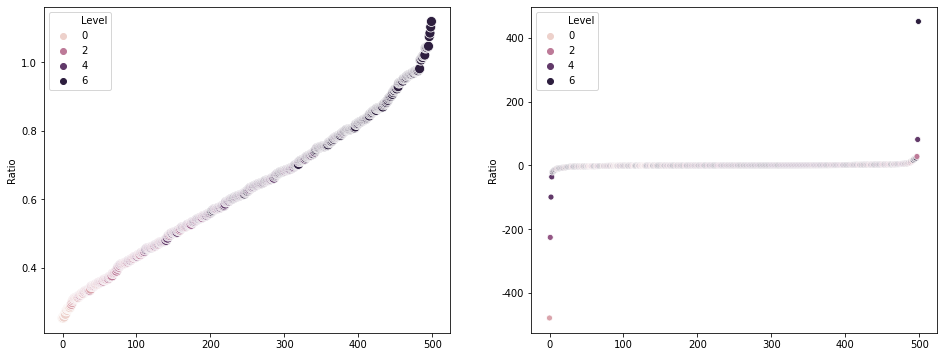

In [7]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
ax = sns.scatterplot(x=df1.index, y="Ratio",s=100,hue='Level',data=df1,ax=axes[0])
ax = sns.scatterplot(x=df2.index, y="Ratio",hue='Level',data=df2,ax=axes[1])

Weight正则化对比

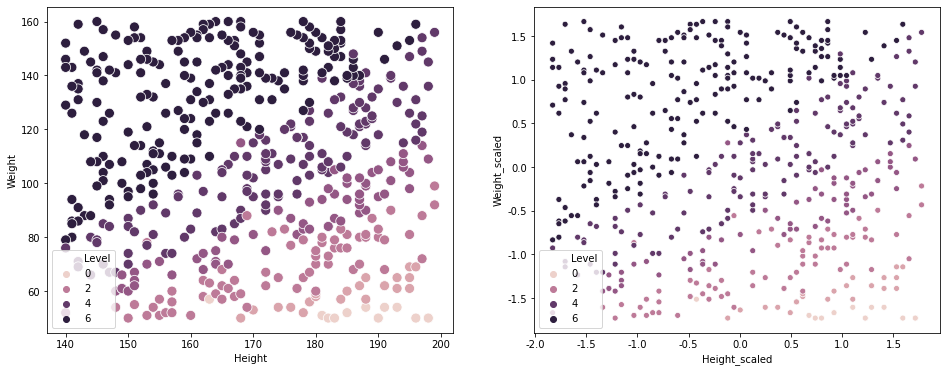

In [8]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
ax = sns.scatterplot(x=df2.Height, y="Weight",s=100,hue='Level',data=df2,ax=axes[0])
ax = sns.scatterplot(x=df2.Height_scaled, y="Weight_scaled",hue='Level',data=df2,ax=axes[1])

Height正则化对比

<AxesSubplot:>

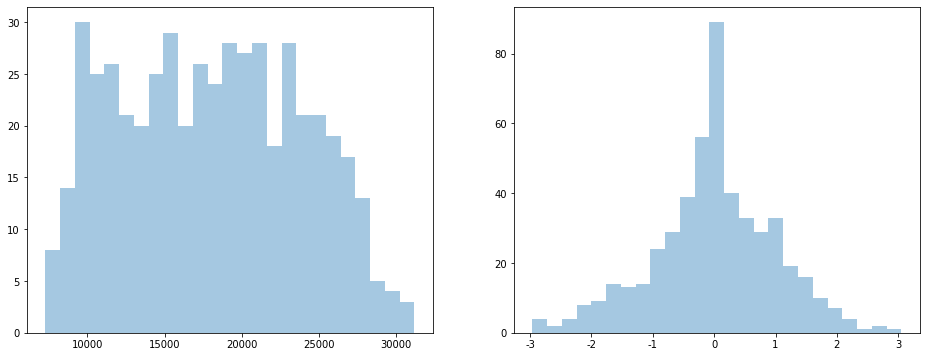

In [9]:
fig,axes=plt.subplots(1,2,figsize=(16,6))

sns.distplot(df2['Height']*df2['Weight'], bins=25,ax=axes[0],kde=False)
sns.distplot(df2['Height_scaled']*df2['Weight_scaled'], bins=25,ax=axes[1],kde=False)
